In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Task 1. Load CSV file of COVID-19 cases into a dataframe using pd.read_csv()

cases_df = pd.read_csv("enhanced_sur_covid_19_eng.csv") 
cases_df.head()
# cases_df.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [55]:
# Task 2. Removing an empty column

cases_df.drop(columns=['Name of hospital admitted'])

# cases_df


,Case no.,Report date,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39.0,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,Discharged,Non-HK resident,Imported case,Confirmed
...,...,...,...,...,...,...,...,...,...
13096,13097,20/01/2022,Asymptomatic,M,11.0,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic
13097,13098,20/01/2022,18/01/2022,M,14.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed
13098,13099,20/01/2022,18/01/2022,M,16.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed
13099,13100,20/01/2022,18/01/2022,F,1.0,To be provided,HK resident,Epidemiologically linked with local case,Confirmed


Hospitalised/Discharged/Deceased
Deceased            213
Discharged        12493
Hospitalised        340
No admission         36
To be provided       14
Name: Case no., dtype: int64
HK/Non-HK resident
HK resident        12445
Non-HK resident      651
Name: Case no., dtype: int64


Text(0.5, 1.0, 'Residency of Cases')

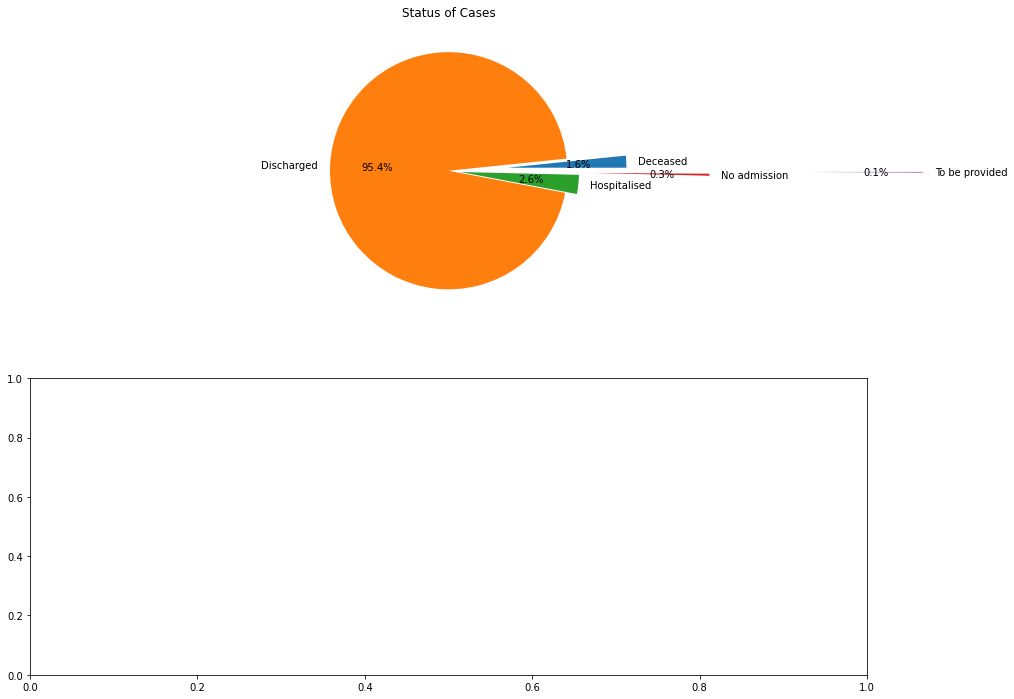

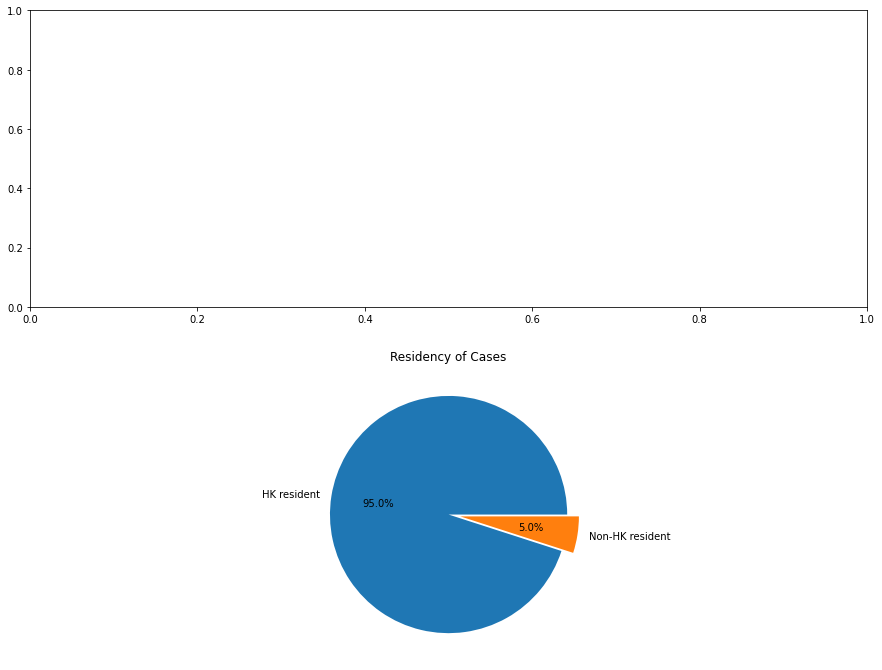

In [78]:
# Task 3.  Show pie charts of status of cases and the classification

st_stat = cases_df.groupby(['Hospitalised/Discharged/Deceased']).count()
st_stat = st_stat[:]['Case no.']
print(st_stat)

fig, ax = plt.subplots(2, figsize=(15, 12))
ax[0].pie(st_stat, labels=st_stat.index, autopct='%1.1f%%', explode=(0.5, 0, 0.1, 1.2, 3.0))
ax[0].set_title('Status of Cases')

# ADD YOUR CODE HERE
st_stat = cases_df.groupby(['HK/Non-HK resident']).count()
st_stat = st_stat[:]['Case no.']
print(st_stat)

fig, ax = plt.subplots(2, figsize=(15, 12))
ax[1].pie(st_stat, labels=st_stat.index, autopct='%1.1f%%',explode=(0,.1,))
ax[1].set_title('Residency of Cases')


In [57]:
# # Task 4. Create a new column called ‘Asymptomatic’ and set it to ‘Y’ if the case is asymptomatic and ‘N’ if otherwise. 

def setAsymptomatic(row):
    if row[2] == "Asymtomatic":
        return "Yes"
    else:
        return "No"
    
cases_df['Asymptomatic'] = cases_df.apply(setAsymptomatic, axis=1)
cases_df.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*,Asymptomatic
13096,13097,20/01/2022,Asymptomatic,M,11.0,NaN,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic,No
13097,13098,20/01/2022,18/01/2022,M,14.0,NaN,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,No
13098,13099,20/01/2022,18/01/2022,M,16.0,NaN,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,No
13099,13100,20/01/2022,18/01/2022,F,1.0,NaN,To be provided,HK resident,Epidemiologically linked with local case,Confirmed,No
13100,13101,20/01/2022,Asymptomatic,M,12.0,NaN,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic,No


In [58]:
# Task 5. There are other text values in ‘Date of onset’ aside from ‘Asymptomatic’. Run the code below to get a list of these values and display them in your notebook.
# Use a set to contain all the text values found in ‘Date of onset’ column
# print("set of 'Date of onset':\n", set(cases_df["Date of onset"]))

#print(cases_df[1368:1373]['Date of onset'])
cases_df['Date of onset'] = pd.to_datetime(cases_df['Date of onset'], infer_datetime_format=True, errors='coerce')

# ADD YOUR CODE HERE FOR THE COLUMN 'Report date'
cases_df['Report date'] = pd.to_datetime(cases_df['Report date'], infer_datetime_format=True, errors='coerce')

print(cases_df[1368:1373]['Date of onset'])
# print(cases_df.dtypes)


1368          NaT
1369          NaT
1370   2020-07-05
1371          NaT
1372          NaT
Name: Date of onset, dtype: datetime64[ns]


Text(0.5, 1.0, 'Daily Reported Cases')

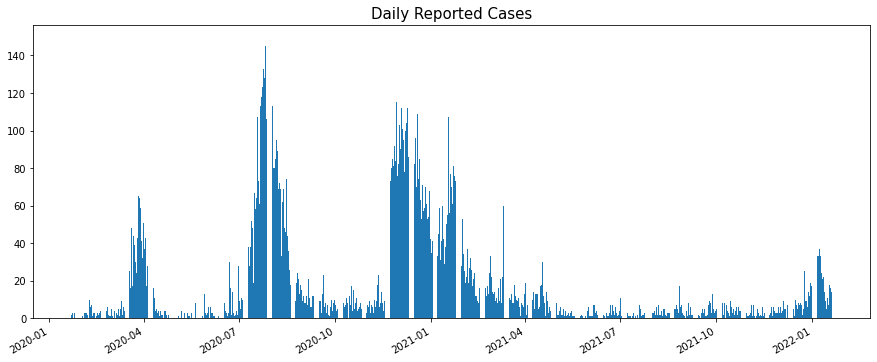

In [59]:
# Task 6. Plot the number of daily reported cases

# ADD YOUR CODE HERE

freq_stat = cases_df.groupby(cases_df['Report date'].dt.date).count()
# freq_stat = freq_stat[-200:]
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Daily Reported Cases', fontsize=15)


Text(0.5, 1.0, 'Daily Reported Cases')

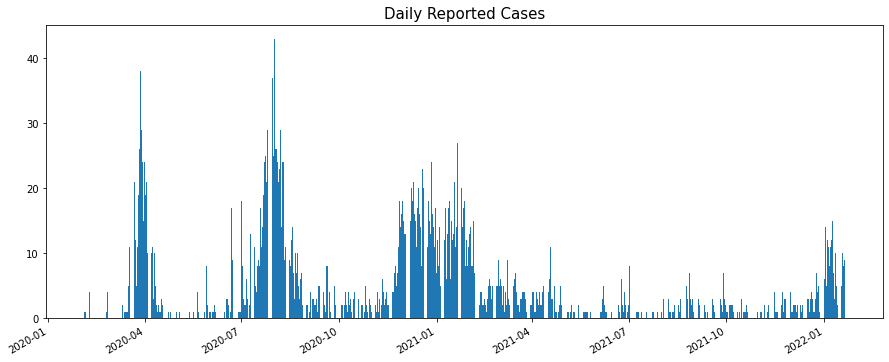

In [60]:
# Task 7. Plot the number of age < 30 cases

# sp_cases = cases_df[cases_df['Gender'] == 'F']
sp_cases = cases_df[pd.to_numeric(cases_df['Age'], errors='coerce') < 30]

freq_stat = sp_cases.groupby(sp_cases['Report date'].dt.date).count()
# freq_stat = freq_stat[-200:]
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Daily Reported Cases', fontsize=15)



Text(0.5, 1.0, 'Daily Reported Cases (Local)')

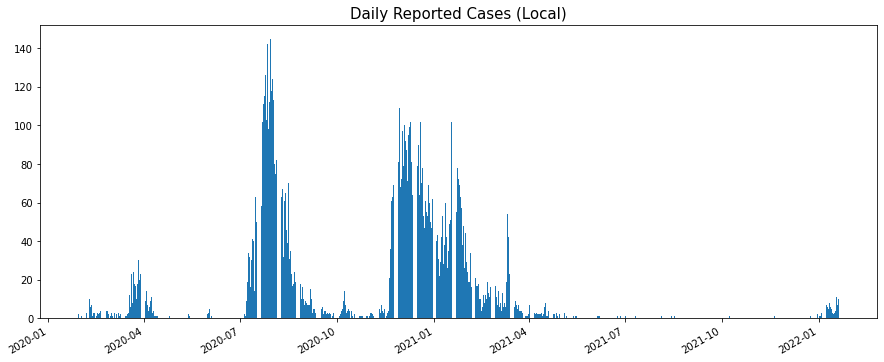

In [61]:
# Task 8. Plot the number of local cases

# ADD YOUR CODE HERE

# print(set(cases_df["Classification*"]))

local_cases = cases_df[(cases_df['Classification*'] == 'Local case') |
(cases_df['Classification*'].str.contains('Local case', case=False)) | 
(cases_df['Classification*'] == 'Epidemiologically linked with imported case')]
freq_stat = local_cases.groupby(local_cases['Report date'].dt.date).count()
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Daily Reported Cases (Local)', fontsize=15)

In [62]:
# Task 9. Set a new monthly index

# ADD YOUR CODE HERE

# print(cases_df.columns)

def set_monthly(row):
    return str(row['Report date'])[:7]

cases_df['Monthly'] = cases_df.apply(set_monthly, axis=1)
print(cases_df['Monthly'])

0        2020-01
1        2020-01
2        2020-01
3        2020-01
4        2020-01
          ...   
13096    2022-01
13097    2022-01
13098    2022-01
13099    2022-01
13100    2022-01
Name: Monthly, Length: 13101, dtype: object


Index(['Case no.', 'Report date', 'Date of onset', 'Gender', 'Age',
       'Name of hospital admitted', 'Hospitalised/Discharged/Deceased',
       'HK/Non-HK resident', 'Classification*', 'Case status*', 'Asymptomatic',
       'Monthly'],
      dtype='object')


Text(0.5, 1.0, 'Monthly Reported Cases (Local)')

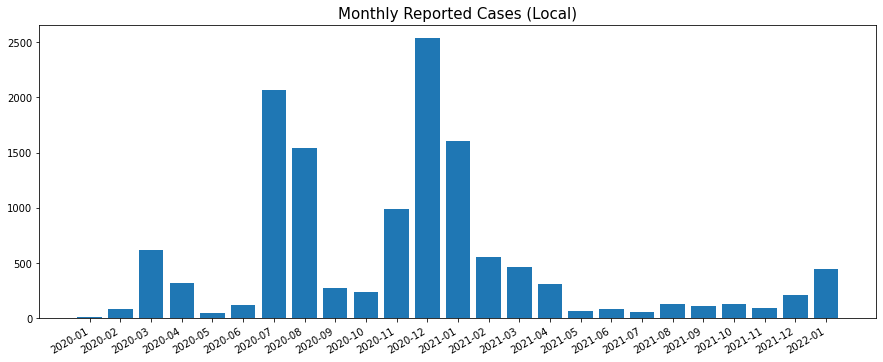

In [63]:
# Task 10. Plot the monthly number of local cases 

# ADD YOUR CODE HERE

print(cases_df.columns)

freq_stat = cases_df.groupby(cases_df['Monthly']).count()
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Monthly Reported Cases (Local)', fontsize=15)

In [64]:
# Task 11. Run the following code to add a new column 'Diff Days' which contains the difference between 'Report Date' and 'Date of Offset' for non-asymptomatic cases.

# ADD YOUR CODE HERE
def cal_lapse(row):
    if (row['Asymptomatic'] != 'Y'):
        try:
            report_date = pd.to_datetime(row['Report date']).date()
            onset_date = pd.to_datetime(row['Date of onset']).date()
            lapse = report_date - onset_date
            return lapse.days
        except:
            return None
    else:
        return None

cases_df['Lapse Days'] = cases_df.apply(cal_lapse, axis=1)


cases_df[0:81]

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*,Asymptomatic,Monthly,Lapse Days
0,1,2020-01-23,2020-01-21,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed,No,2020-01,2.0
1,2,2020-01-23,2020-01-18,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed,No,2020-01,5.0
2,3,2020-01-24,2020-01-20,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed,No,2020-01,4.0
3,4,2020-01-24,2020-01-23,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed,No,2020-01,1.0
4,5,2020-01-24,2020-01-23,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed,No,2020-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,2020-02-24,2020-02-19,F,68.0,NaN,Discharged,HK resident,Epidemiologically linked with possibly local case,Confirmed,No,2020-02,5.0
77,78,2020-02-24,2020-02-24,F,59.0,NaN,Discharged,HK resident,Imported case,Confirmed,No,2020-02,0.0
78,79,2020-02-24,2020-02-04,F,58.0,NaN,Discharged,HK resident,Imported case,Confirmed,No,2020-02,20.0
79,80,2020-02-24,NaT,M,57.0,NaN,Discharged,HK resident,Imported case,Confirmed,No,2020-02,NaN


In [65]:
# Task 12. Save the dataframe to CSV file and run Statistics

# ADD YOUR CODE HERE to save the dataframe to CSV file

cases_df.to_csv("ready_cases.csv")

select_df = cases_df[cases_df['Hospitalised/Discharged/Deceased'] == 'Deceased']
print('Mean Age of Deceased: ', select_df['Age'].mean())
print('Mean Age of Deceased by Gender: ', select_df.groupby(['Gender'])['Age'].mean())

print('Mean Lapse Days: ', cases_df['Lapse Days'].mean())

select_df.to_csv("ready_cases_select.csv")



Mean Age of Deceased:  78.03286384976526
Mean Age of Deceased by Gender:  Gender
F    79.666667
M    76.904762
Name: Age, dtype: float64
Mean Lapse Days:  4.757850662944871


<h3 style="color:yellow"> <i>Task 13. Challenging Task</i> </h3>



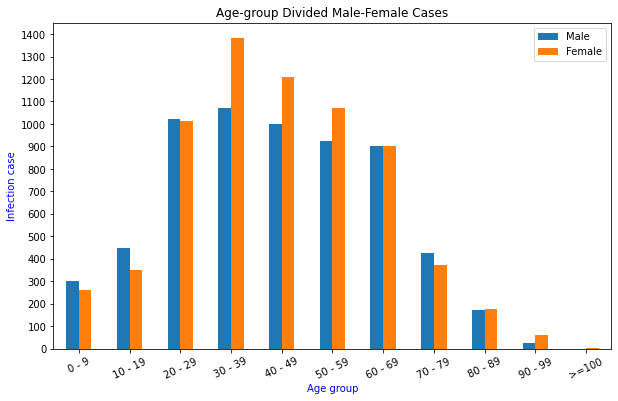

In [80]:
# Task 13. Challenging Task

# tma4 q2a-t13
# purpose: a jupyter notebook that reads in dataset from csv and print out processed findings in a bar chart
# written by Cheung Chun Fai (s1285547)
# On 4/24/2021
# For tma4 q2a-t13 (comp-s258, 2021Autumn)

''' 
objective:
this ipynb file analyses data of covid-19 cases in HK at a specified period,
finds infection cases for each age group (in a interval of 10) of male and female respectively,
and display the finding in a bar chart. 
'''


# create pandas object 
t13_df = pd.read_csv("ready_cases.csv")

# function to add new column as "Age group"
def set_age_group(row):
    if row["Age"] < 10: 
        return "0 - 9"
    elif row["Age"] >= 10 and row["Age"] < 20:
        return "10 - 19"
    elif row["Age"] >= 20 and row["Age"] < 30:
        return "20 - 29"
    elif row["Age"] >= 30 and row["Age"] < 40:
        return "30 - 39"
    elif row["Age"] >= 40 and row["Age"] < 50:
        return "40 - 49"
    elif row["Age"] >= 50 and row["Age"] < 60:
        return "50 - 59"
    elif row["Age"] >= 60 and row["Age"] < 70:
        return "60 - 69"
    elif row["Age"] >= 70 and row["Age"] < 80:
        return "70 - 79"
    elif row["Age"] >= 80 and row["Age"] < 90:
        return "80 - 89"
    elif row["Age"] >= 90 and row["Age"] < 100:
        return "90 - 99"
    else:
        return ">=100"

# function to add new column as "Male"
def set_male(row):
    if row["Gender"] == 'M':
        return 'M'

# function to add new column as "Female"
def set_female(row):
    if row["Gender"] == 'F':
        return 'F'

# create 3 new columns for plotting purpose
t13_df['Age group'] = t13_df.apply(set_age_group, axis=1)
t13_df['Male'] = t13_df.apply(set_male, axis=1)
t13_df['Female'] = t13_df.apply(set_female, axis=1)

# sort and group the pandas object
t13_sorted = t13_df.sort_values(by="Age")
t13_grp= t13_sorted.groupby("Age group")


# plot the graph
ax = t13_grp.count().plot(kind='bar', figsize=(10,6), rot=25, y=["Male", "Female"], title="Age-group Divided Male-Female Cases")
ax.set(ylabel="Infection case")
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
ax.set_yticks(range(0,1500,100))
frameon=False

